In [49]:
# imports:
import numpy as np
import math, os, pickle
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt

import statistics

In [50]:
class color:
    '''Printing pretty'''
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
    
def netPlot(instance, error):
    ''' Plot the error '''
    instance = list(range(0, instance))
    with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'green', 'figure.facecolor':'white'}):
        fig, ax = plt.subplots()
        ax.plot(instance, error)
        ax.set(xlabel='batch numebr (s)', ylabel='error (net)',
               title='Average Net Error for each batch run')
        ax.grid()
    plt.show()
    
def sigmoid(x):  
    '''Hidden layer activation always, single output activation function'''
    return 1/(1+np.exp(-x))

def sigmoid_der(x): 
    '''back prop on activation hidden'''
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A): 
    ''' activation of output for multi class'''
    expA = np.exp(A)
    return expA / expA.sum()

def load_objects(file):
    with open(file, 'rb') as input:
        return pickle.load(input)
    
def save_it_all(obj, filename):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def saveNet(wh, bh, wo, bo, fileName):
    weights = {"wh":wh, "bh":bh, "wo":wo, "bo":bo}
    save_it_all(weights, fileName)
    
def getArrayFromFile(name):
    array = genfromtxt(name, delimiter=',')
    return array

def mapTargetsToEncoded(targets, tMap):
    '''for multi class we need to replace the single target eith ethe encoded target'''
    newTargets = []
    for item in targets.tolist():
        newTargets.append(tMap[int(item[0])])
    return newTargets

In [51]:
def nn(inputInstance, targetInstance, weightHidden, biasHidden, weightOutput, biasOutput, ohe):
    '''neural net'''
        # feed forward
        # Phase 1 inputs fed through to hidden
        zetaHidden = np.dot(inputInstance, weightHidden) + biasHidden
        activationHidden = sigmoid(zetaHidden)
        
        # Phase 2 hidden fed through to the output
        zetaOutput = np.dot(activationHidden, weightOutput) + biasOutput
        if ohe == 1 :
            activationOutput = softmax(zetaOutput)
        else:
            activationOutput = sigmoid(zetaOutput)
        #### backpropigate with the cross entropy cost function 
        # phase one 
        derivativecost_zetaOutput = activationOutput - targetInstance


        derivativeZetaOutput_derivatieWeightOutput = activationHidden


        derivativecost_weightOutput = np.dot(derivativeZetaOutput_derivatieWeightOutput.T, derivativecost_zetaOutput)


        derivativecost_biasOutput = derivativecost_zetaOutput

        #     # phase two
        derivativeZetaOutput_derivativeActivationHidden = weightOutput

        derivativeCost_derivativeActivationHidden = np.dot(derivativecost_zetaOutput , derivativeZetaOutput_derivativeActivationHidden.T)

        derivativeActivationHidden_derivativeZetaHidden = sigmoid_der(zetaHidden)

        derivativeZetaHidden_derivativeWeightHidden = inputInstance

        derivativeCost_weightHidden = np.dot(derivativeZetaHidden_derivativeWeightHidden.T, derivativeActivationHidden_derivativeZetaHidden * derivativeCost_derivativeActivationHidden)

        derivativeCost_biasHidden = derivativeCost_derivativeActivationHidden * derivativeActivationHidden_derivativeZetaHidden


        #  update Weights 

        weightHidden -= learningRate * derivativeCost_weightHidden

        biasHidden -= learningRate * derivativeCost_biasHidden.sum(axis=0)

        weightOutput -= learningRate * derivativecost_weightOutput

        biasOutput -= learningRate * derivativecost_biasOutput.sum(axis=0)
        
        loss = np.sum(-targetInstance * np.log(activationOutput))
        
        return (loss, weightHidden, biasHidden, weightOutput, biasOutput)

IndentationError: unexpected indent (<ipython-input-51-84546ffb6a91>, line 5)

In [52]:

def main():
    # load in normalized data set 
    # dataSetFile, saveFile, testFile = ("normalizeFish.csv", "./fishNet.pkl", "normalizeFishTest.csv")
    dataSetFile, saveFile, testFile = ("normDigit.csv", "./digitNet.pkl", "testDigit.csv")
    data = getArrayFromFile(dataSetFile)
    inputs = data[:,0:data.shape[1]-1] # get the input values
    targets = data[:, data.shape[1]-1:data.shape[1]] # get the class values
    ohe = 0

    if np.unique(targets).shape[0] > 2:
        targetMap = load_objects("./TestingdigitTargetCleanDict.pkl")
        oneHotTargets = np.asarray(mapTargetsToEncoded(targets, targetMap), dtype=np.float32)
        ohe = 1

    instances = inputs.shape[0]
    attributes = inputs.shape[1]

    numInputNodes = attributes
    numOutputNodes = 1 if np.unique(targets).shape[0] == 2 else np.unique(targets).shape[0]
    numHiddenNodes = int((2/3)*(numInputNodes+numOutputNodes))

    print("Input node num: "+ str(numInputNodes))
    print("Hidden node num: "+ str(numHiddenNodes))
    print("Output node num: " + str(numOutputNodes))

    lowRange = (-1/math.sqrt(numInputNodes))
    highRange = math.fabs(lowRange)

    weightHidden = np.random.uniform(low=lowRange, high=highRange, size=(numInputNodes, numHiddenNodes, ))
    biasHidden = np.random.uniform(low=lowRange, high=highRange, size=(numHiddenNodes))

    weightOutput = np.random.uniform(low=lowRange, high=highRange, size=(numHiddenNodes, numOutputNodes))
    biasOutput = np.random.uniform(low=lowRange, high=highRange, size=(numOutputNodes))

    print()
    print(str(weightHidden.shape))
    print(str(biasHidden.shape))
    print(str(weightOutput.shape))
    print(str(biasOutput.shape))

    print()
    print(str(inputs.shape))
    print()
    learningRate = .01

    errorCost = []
    batchError = []

    for epoch in range(55):
        trackedNetError= []
        print("------------Epoch: "+str(epoch)+"--")
        for instanceRow in range(0, instances):

            inputInstance = np.array([inputs[instanceRow]])
            if ohe == 1:
                targetInstance = np.array([oneHotTargets[instanceRow]])
            else:
                targetInstance = targets[instanceRow]

            loss, weightHidden, biasHidden, weightOutput, biasOutput = nn(inputInstance, targetInstance, weightHidden, biasHidden, weightOutput, biasOutput, ohe)

            trackedNetError.append(loss)
        avg_err = statistics.mean(trackedNetError)
        print("Loss: "+str(avg_err))
        batchError.append(avg_err)
        print()
    
    netPlot(55, batchError)
    saveNet(weightHidden, biasHidden, weightOutput, biasOutput, saveFile)
    Classify(testFile, saveFile)

# Classify digits

In [55]:
def Classify(fileName, netName):
    data = getArrayFromFile(fileName)
    #data = np.array([getArrayFromFile("normalizeFishTest.csv")])
    inputs = data[:,0:data.shape[1]-1] # get the input values
    targets = data[:, data.shape[1]-1:data.shape[1]] # get the class values

    ohe = 0

    if np.unique(targets).shape[0] > 2:
        ohe = 1

    instances = inputs.shape[0]
    attributes = inputs.shape[1]

    numInputNodes = attributes
    numOutputNodes = 1 if np.unique(targets).shape[0] == 2 else np.unique(targets).shape[0]
    numHiddenNodes = int((2/3)*(numInputNodes+numOutputNodes))

    nnw = load_objects(netName)

    weightHidden = nnw["wh"]
    biasHidden = nnw["bh"]
    weightOutput = nnw["wo"]
    biasOutput = nnw["bo"]

    correct = 0
    for instanceRow in range(0, instances):

        inputInstance = np.array([inputs[instanceRow]])
        target = int(targets[instanceRow][0])

        zetaHidden = np.dot(inputInstance, weightHidden) + biasHidden
        activationHidden = sigmoid(zetaHidden)

        zetaOutput = np.dot(activationHidden, weightOutput) + biasOutput
        if ohe == 1:
            activationOutput = softmax(zetaOutput)
        else:
            activationOutput = sigmoid(zetaOutput)

        pred = np.where(activationOutput==np.max(activationOutput))[1][0] if ohe == 1 else int(round(activationOutput[0][0]))

        if(pred == target):
            correct = correct + 1

    totalPercentRight = (correct/instances)*100
    print("Correct for: "+str(totalPercentRight))

Input node num: 64
Hidden node num: 49
Output node num: 10

(64, 49)
(49,)
(49, 10)
(10,)

(3823, 64)

------------Epoch: 0--
Loss: 0.4696538172296563

------------Epoch: 1--
Loss: 0.21184105850615134

------------Epoch: 2--
Loss: 0.1646573538182694

------------Epoch: 3--
Loss: 0.13275883317374831

------------Epoch: 4--
Loss: 0.12144286440759183

------------Epoch: 5--
Loss: 0.0854622335415775

------------Epoch: 6--
Loss: 0.08304197795254534

------------Epoch: 7--
Loss: 0.08573324477979248

------------Epoch: 8--
Loss: 0.09705173611549056

------------Epoch: 9--
Loss: 0.06956847807375968

------------Epoch: 10--
Loss: 0.054791311612933706

------------Epoch: 11--
Loss: 0.054624873293919726

------------Epoch: 12--
Loss: 0.06956940078505625

------------Epoch: 13--
Loss: 0.05807027989732114

------------Epoch: 14--
Loss: 0.055726311549289954

------------Epoch: 15--
Loss: 0.049574237792972556

------------Epoch: 16--
Loss: 0.05231671650358773

------------Epoch: 17--
Loss: 0.0381843

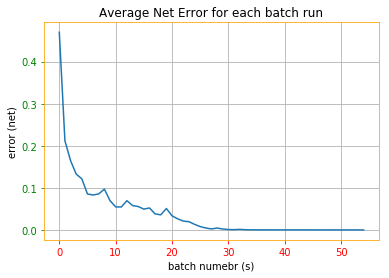

Correct for: 96.93934335002783


In [56]:
if __name__ == "__main__": main()